# Computational Physics project: Numerical Heisenberg-Langevin equation solver for parametric amplification of quantum noise

### Author: Tero Korkalainen, 526034

## 1 Introduction
Entanglement is a critical resource in quantum information processing and quantum computation. The ground state of a quantum field may act as a source for generating entanglement [1]. In particular, squeezing is a key operation in generating coherence with continuous variable (CV) states from vacuum fluctuations. Squeezed states are the result of applying the unitary squeezing-operator to the vacuum state, thus lowering the uncertainty of one of the mode quadratures with the expense of increasing it in the other [2]. Multimode CV quantum states are shown to exhibit various promising phenomena in applications such as quantum state sharing [3], dense coding [4], error correction [5] and quantum  teleportation [6]. Moreover, CV cluster states show potential as a universal quantum computing platform [7].

Superconducting microwave resonators have been used extensively in experimental studies of artificial two-level systems, both in conventional qubit systems as well as CV systems. Squeezed microwave fields can be generated  by amplifying the quantum noise in superconducting cavities by flux-tuning the effective energy of a superconducting quantum interference device(SQUID) [8]. Squeezed  states  produced  by  microwave  cavities  have  been shown to exhibit correlations between photons in separate frequency modes and genuine entanglement [9]. Coherence originating from vacuum fluctuations can be enhanced via parametric modulation. Parametric amplification of vacuum fluctuations in a superconducting microwave circuit has been demonstrated to generate spontaneous downconversion processes, analogous to the dynamical Casimir effect [10].

This computational project presents a numerical solver based on the mid-point method for the Heisenberg-Langevin equation describing the parametric amplification process of the ground state fluctuations in a capacitor-shunted SQUID resonator under two pump tones, similar to the experimental setup [11] by P. Lähteenmäki et. al. Moreover, the system is simulated using various values of the normalized pump power and the field quadratures are extracted from the output field. The coherence is characterized both in the frequency domain by cross-correlating pairs of the frequency bands.



## 2 Simulation results

The dynamics of the superconducting flux-tunable microwave resonator under multiple pump tones is governed by the semi-classical Hamiltonian (given that the system response can be assumed to be linear, i.e., the relative pump power is sufficiently low):
\begin{equation}\label{21}
    H = \hbar\omega_{res}a^\dagger a + \frac{\hbar}{2i}\sum_{p=1}^{d}[\alpha^*_{p}e^{i\omega_pt}+\alpha_pe^{-i\omega_pt}](a+a^\dagger)^2,
\end{equation}

where the final index in the sum, $d$, is set to be equal to $2$ in this study, corresponding to a double pumping configuration. The coupling strength of the pump indexed by $p$ into the cavity is given by the parameter $\alpha_p$, which is proportional to the pumping power as described in the supplement of [11]. Furthermore, the phase dependence of the correlations can be studied by modifying the pump phase, $\phi_p$, included in the phase term of $\alpha_p$, utilizing the proportionality:
\begin{equation}
\alpha_p \propto e^{i\phi_p},
\end{equation}
however, the effect of the phase difference on the coherence properties is omitted in this study.

The frequencies of the pumps and the cavity are denoted by $\omega_p$ and $\omega_{res}$. Photon pairs are generated by parametric downconversion processes on frequency bands located symmetrically about half of the pump's frequency. The detuning of the pump frequency with respect to the cavity frequency is denoted by
\begin{equation}\label{22}
        \Delta_p = \frac{\omega_p}{2} - \omega_{\mathrm{res}}.\\
\end{equation}
The simulations are based on numerically solving the Heisenberg-Langevin equation in the the rotating frame of the cavity, and furthermore, utilizing the rotating wave approximation to neglect higher frequency components of the field. After these approximations the Heisenberg-Langevin equation is of the form:
\begin{equation}\label{23}
    \frac{\mathrm{d}a}{\mathrm{dt}} = \sum_{p=1}^{d}\alpha_{p}e^{2i\Delta_pt}a^\dagger -\frac{\kappa}{2}a -\sqrt{\kappa}a_{\mathrm{in}},
\end{equation}
which is readily solved by the midpoint method. The input field $a_{in}$ is simulated as randomly generated Gaussian white noise. After the time-evolution of the cavity field mode is solved numerically, the output field in the is obtained by input-output formalism. The output field is then Fourier transformed to the frequency domain, where the relevant frequency bands in terms of the correlations are determined.

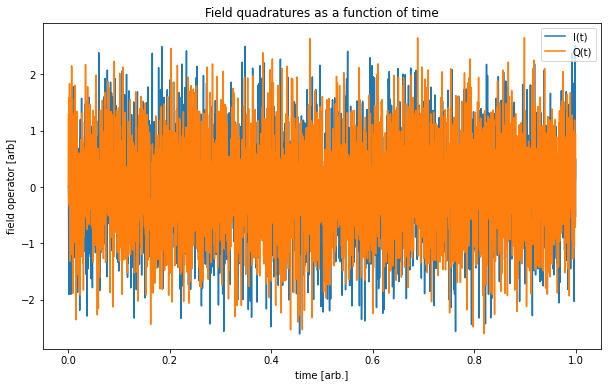

In [528]:
#Computational Physics project: Langevin equation for parametric amplification of quantum noise

import math
import random
import matplotlib
import numpy as np
from numpy import exp,pi,zeros,ceil
from matplotlib import pyplot as plt


ph1 = 0.4 #0.51; # phase [radians] of left pump
ph2 = -0.4#-0.43; % phase of right pump
k = 1 #cavity decay rate 'kappa'
f = 2e4 #frequency of the pump - other pump has the same frequency but negative w.r.t the cavity resonance frequency

ampStep = 0.005# 0.025, 0.001
ampMax = 0.4# 0.35, 0.20/0.30
phStep = pi/32# pi/64
phMax = 2*pi

def MPSolver(N, t, Amp): #function solves the Langevin equation numerically and calculates the output field using input-output theory
        #the number of time points, the time difference between steps and amplitude of each pump
        # Midpoint-method solver for the Heisenberg-Langevin eq.
        aout = np.zeros(N,complex)
        a = np.zeros(N+1,complex)
        da = np.zeros(N,complex)
        ain = np.transpose(exp(2*pi*1j*np.random.rand(1,N))) #randomly generated vacuum field
        a[0] = 1
        
        #initial condition and first time step evaluated using explicit Euler's method
        dt = t[1]
        da[0] = np.conjugate(a[0])*(exp(-1j*ph1)*Amp*exp(-1j*2*pi*f*(t[1]*1.5))+exp(-1j*ph2)*Amp*exp(1j*2*pi*f*(t[1]*1.5)))-(k/2)*a[0]-np.sqrt(k)*ain[0]
        a[1] = a[0]+ da[0]
        
        #loop for the mid-point method                            
        for n in range(1,N):
            da[n] = np.conjugate(a[n])*(exp(-1j*ph1)*Amp*exp(-1j*2*pi*f*(t[n]+dt/2))+exp(-1j*ph2)*Amp*exp(1j*2*pi*f*(t[n]+dt/2)))-(k/2)*a[n]-np.sqrt(k)*ain[n]
            a[n+1] = a[n] + 2*da[n]
            
            #input-output formalism to extract the output field
            aout1 = np.sqrt(k)*a[n] + ain[n]
            aout2 = np.sqrt(k)*a[n+1] + ain[n]
            aout[n] = 0.5*(aout1 + aout2) #numerical convenience - smooths the data between consecutive points
        return aout

#Example of a time-domain solution below
N = 2**12
t = np.linspace(0, 1, N);
aout = MPSolver(N, t, 0.15*k)
plt.figure(figsize=(10,6))
plt.plot(t,np.real(aout),label='I(t)')
plt.plot(t,np.imag(aout),label='Q(t)')
plt.xlabel('time [arb.]')
plt.ylabel('field operator [arb]')
plt.title('Field quadratures as a function of time')
plt.legend(loc='upper right')
    

As can be seen from the time-evolved field quadratures, the cavity dynamics seem random in the time domain. Analysis in the frequency domain however provides more insight on the coherence properties. In the following, the same system is solved using a higher number of time points, corresponding to a higher sampling frequency. This is necessary in order to obtain large enough frequency bands between the pump offset frequencies, and moreover, it is experimentally more feasible. The time-domain solution is Fourier-transformed in order to characterize the gain spectrum and frequency bands.

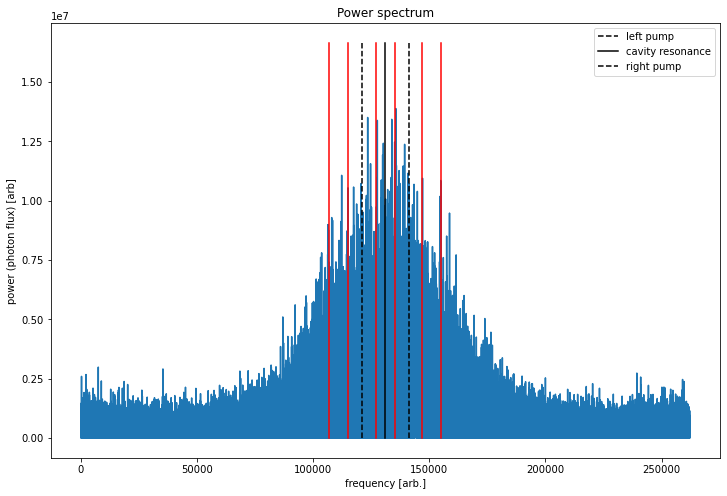

In [529]:
# Executing this cell can take up to a minute for N = 2**20
from numpy import exp,pi,zeros,ceil
from scipy import signal

N = 2**18
HW = 2**12 # window bandwidth
t = np.linspace(0, 1, N)
dt = t[2]
aout = MPSolver(N, t, 0.2*k)
aout = aout - np.mean(aout) # subtracting the mean
FT = np.fft.fftshift(np.fft.fft(aout)) #Fourier transform of the time-evolved field operator with shift to center

#plotting the
upperLim = 1.2*max(abs(FT)**2);
plt.figure(figsize=(12,8))
plt.plot(abs(FT)**2)
plt.plot([N/2-f/2, N/2-f/2], [0, upperLim], '--k', label= 'left pump')
plt.plot([N/2+0, N/2+0], [0, upperLim], 'k',label= 'cavity resonance')
plt.plot([N/2+f/2, N/2+f/2], [0,upperLim], '--k',label= 'right pump')
plt.plot([N/2-f-HW, N/2-f-HW], [0, upperLim], 'r')
plt.plot([N/2-f+HW, N/2-f+HW], [0, upperLim], 'r')
plt.plot([N/2-0-HW, N/2-0-HW], [0, upperLim], 'r')
plt.plot([N/2-0+HW, N/2-0+HW], [0, upperLim], 'r')
plt.plot([N/2+f-HW, N/2+f-HW], [0, upperLim], 'r')
plt.plot([N/2+f+HW, N/2+f+HW], [0, upperLim], 'r')
plt.xlabel('frequency [arb.]')
plt.ylabel('power (photon flux) [arb]')
plt.title('Power spectrum')
plt.legend(loc='upper right')

#Determining the frequency bands
b1 = FT[int(N/2-f+0-HW):int(N/2-f+0+HW)]
b2 = FT[int(N/2+0-HW):int(N/2+0+HW)]
b3 = FT[int(N/2+f+0-HW):int(N/2+f+0+HW)]



The power spectrum of the cavity under parametric amplification follows approximately a Lorentzian envelope, as expected. The cavity resonance and the two pump tones are plotted as the solid and dashed black lines, respectively. The solid red lines denote the edges of the frequency bands, which are placed symmetrically about the pump offset frequencies. The bands are indexed from left to right by 1, 2 and 3. The parametric downconversion process will convert a microwave photon at the pump offset frequency to a photon pair. This pair will have one photon at the band with lower frequency and one photon at the consecutive band with higher frequency, such that the frequencies will be mirrored about the pump offset. This type of correlation is called squeezing correlation. Moreover, this process will generate beam-splitter type correlations across the extremal bands.

Squeezing correlation and beamsplitter correlation are defined respectively as (similarly as in the supplement of [11])
\begin{equation}
    (f\star \tilde{g})[n] = \sum_{m=1}^k f^{\star}[m]g[n-m],
\end{equation}
\begin{equation}
    (f\star g)[n] = \sum_{m=1}^k f^{\star}[m]g[n+m],
\end{equation}
where $f$ and $g$ are vectors which correspond to the frequency bands and $\tilde{g}$ denotes the flipped vector $g$, i.e., the order of the frequencies is reversed. Using the signal package of the Scipy library, these correlations can be readily evaluated. In the correlation plot below the beamsplitter correlations are abbreviated by 'BSC' and squeezing correlations by 'SQC'. E.g. BSC 1-2 denotes the beamsplitter correlations between bands 1 and 2.

(0.0, 9916150454.834578)

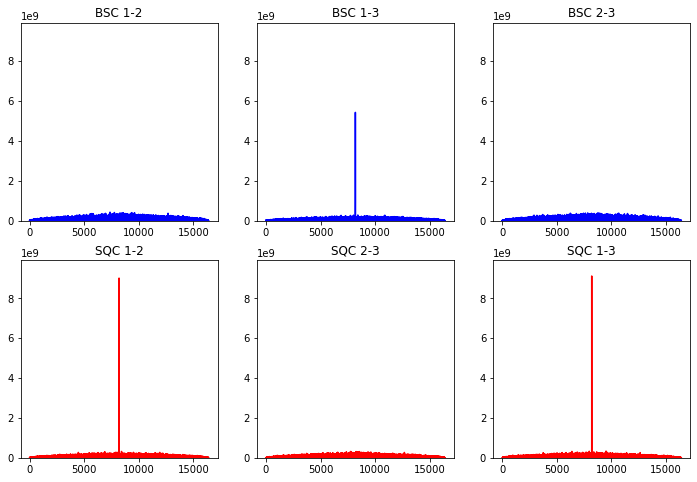

In [509]:
plt.figure(figsize=(12,8))
limitcorr = 1.1*max(abs(signal.correlate(np.conjugate(b1),np.flip(b2))))
plt.title('Beam-splitter and squeezing correlations correlations')
plt.subplot(2,3,1)
plt.title('BSC 1-2')
plt.plot(abs(signal.correlate(b1,b2)),'b')
plt.ylim([0, limitcorr])
plt.subplot(2,3,2)
plt.title('BSC 1-3')
plt.plot(abs(signal.correlate(b1,b3)),'b')
plt.ylim([0, limitcorr])
plt.subplot(2,3,3)
plt.title('BSC 2-3')
plt.plot(abs(signal.correlate(b2,b3)),'b')
plt.ylim([0, limitcorr])
plt.subplot(2,3,4)
plt.title('SQC 1-2')
plt.plot(abs(signal.correlate(np.conjugate(b1),np.flip(b2))),'r')
plt.ylim([0, limitcorr])
plt.subplot(2,3,5)
plt.title('SQC 2-3')
plt.plot(abs(signal.correlate(np.conjugate(b1),np.flip(b3))),'r')
plt.ylim([0, limitcorr])
plt.subplot(2,3,6)
plt.title('SQC 1-3')
plt.plot(abs(signal.correlate(np.conjugate(b2),np.flip(b3))),'r')
plt.ylim([0, limitcorr])

The squeezing correlations appear between pairs of bands which are symmetrically placed about a pump frequency, while the beamsplitter correlation appears only when correlating the two extremal bands. The numerical value of the squeezing correlation is larger than the beamsplitter correlation. This is a reasonable result, since the beamsplitter correlation requires that the photon pairs are squeezing correlated first across the first pump and then across the second pump. Thus, the frequency-domain path of the photon is longer in the sense that two operations must be applied consecutively, and information can be lost as there are dissipative mechanisms in the system.


## Conclusion

A superconducting microwave resonator under parametric amplification in a double pumping configuration was studied by numerically solving the Heisenberg-Langevin equation which is obtained from a semiclassical Hamiltonian. Pumping the cavity resulted in correlated frequency bands about the offset frequencies of the pumps. Two types of correlations result from parametric downconversion processes in the cavity. Squeezing correlations emerge between bands which are symmetric about a pump offset frequency, and beamsplitter-type correlations are generated between the two extremal bands.

The solver can be easily extended to account for phase and amplitude dependence of the correlations. Moreover, adding further pump terms is straightforward, however, the total output power of additional pumps cannot be arbitrarily high as the cavity must remain in the linear regime for the semi-classical approximation to be valid. Multiple pump configurations can be employed to generate even more complex multipartite systems. Classification of entanglement would require further analysis in the time-domain. Since the Hamiltonian is quadratic in the field operators, the resulting states are always Gaussian, which implies that the first and second statistical moments completely describe the multipartite system [12]. The frequency bands could be inverse Fourier-transformed, and the covariance matrix formalism applied to characterize entanglement in more detail.

The accuracy and generality of the simulations could be further improved by utilizing a Hamiltonian which would include a nonlinear term corresponding to Kerr-nonlinearity and obtaining the resulting Heisenberg-Langevin equation. This would enable the study of nonlinear phenomena such as four-wave mixing and its implications to entanglement properties of multimode CV systems.

## References

[1] S. J.Summers and R. Werner, “The vacuum violates Bell’s inequalities,” Phys.Lett. A, vol. 110, no. 5, 1985.

[2] G. S. Agarwal, Quantum Optics. Cambridge University Press, 2013.

[3] A. M. Lance, T. Symul, W. P. Bowen, B. C. Sanders, T. Tyc, T. C. Ralph,and  P.  K.  Lam, “Continuous variable quantum state  sharing via quantum disentanglement, ” Phys. Rev. A, vol. 71, no. 033814, 2005.

[4] S. L. Braunstein and H. J. Kimble, “Dense coding for continuous variables,” Phys. Rev. A, vol. 61, no. 042302, 1999.

[5] J. Dias and T. C. Ralph, “Quantum error-correction of continuous-variable states with realistic resources,” Phys. Rev. A, vol. 97, no. 032335, 2018.

[6]  G. J. Milburn and S. L. Braunstein, “Quantum teleportation with squeezed vacuum states,” Phys. Rev. A, vol. 60, no. 937, 1999.

[7]  N. C. Menicucci, P. van Loock, M. Gu, C. Weedbrook, T. C. Ralph, and M. A. Nielsen,  “Universal  quantum  computation  with  continuous-variable  cluster states,” Phys. Rev. Lett., vol. 97, no. 110501, 2006.

[8]  B. Yurke, “Squeezed-state generation using a Josephson parametric amplifier,” vol. 4, no. 10, pp. 1551–1557, 1987.

[9]  C. W. S. Chang, M. Simoen, J. Aumentado, C. Sabin, P. Forn-Diaz, A. M. Vadiraj,  F. Quijandria,  G. Johansson,  I. Fuentes,  and C. M. Wilson, “Generating multimode entangled microwaves with a superconducting parametric cavity,” Phys. Rev. Appl., vol. 10, no. 044019, 2018.

[10]  J. R. Johansson, G. Johansson, C. M. Wilson, and F. Nori, “The dynamical Casimir effect in superconducting microwave circuits,” Phys. Rev. A, vol. 82, no. 052509, 2010.

[11]  P. Lähteenmäki, G. S. Paraoanu, J. Hassel, and P. J. Hakonen, “Coherence and multimode correlations from vacuum fluctuations in a microwave super-conducting cavity,” Nat. Comm., vol. 61, no. 12548, 2016

[12]  R. Simon, N. Mukunda, and B. Dutta, “Quantum-noise matrix for multimodesystems: U(n) invariance, squeezing, and normal forms,” Phys. Rev. A, vol. 49,no. 3, 1994.